In [1]:
#Our purpose is to determine the value of the used car

In [1]:
#Importing the libraries used
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [26]:
df = pd.read_csv('Datasets/Regression/Import/diamonds.csv') #importing the dataframe 'test.csv' from the appropriate folder
df = df.drop(['Unnamed: 0'], axis = 1) #removing the column of default indexes: the change was not necessary, only
#for the sake of appearance
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


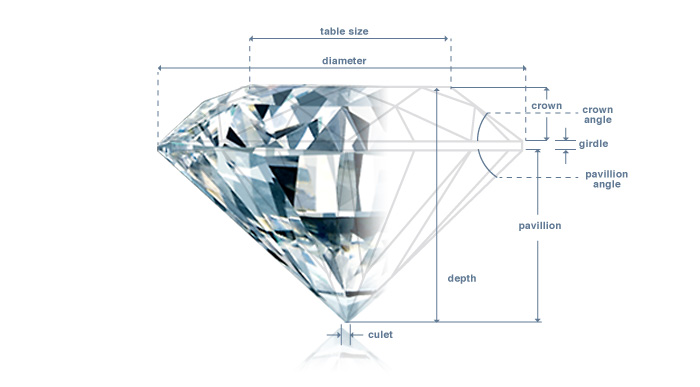

# Explanation what all the terms mean!!!!!!!

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [47]:
dfCopy = df.copy()

In [48]:
dfCopy

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [49]:
dfCopy.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [50]:
dfCopy['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [51]:
dfCopy['cut'] = dfCopy['cut'].replace({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4})
dfCopy['color'] = dfCopy['color'].replace({'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6})
dfCopy['clarity'] = dfCopy['clarity'].replace({'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7})

In [52]:
dfCopy.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [53]:
dfCopy['boxVolume'] = dfCopy['x'] * dfCopy['y'] * dfCopy['z']
dfCopy = dfCopy.drop(['x', 'y', 'z'], axis = 1)
dfCopy

,carat,cut,color,clarity,depth,table,price,boxVolume
0,0.23,4,5,1,61.5,55.0,326,38.202030
1,0.21,3,5,2,59.8,61.0,326,34.505856
2,0.23,1,5,4,56.9,65.0,327,38.076885
3,0.29,3,1,3,62.4,58.0,334,46.724580
4,0.31,1,0,1,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,4,6,2,60.8,57.0,2757,115.920000
53936,0.72,1,6,2,63.1,55.0,2757,118.110175
53937,0.70,2,6,2,62.8,60.0,2757,114.449728
53938,0.86,3,2,1,61.0,58.0,2757,140.766120


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E516E86E50>,
      dtype=object)

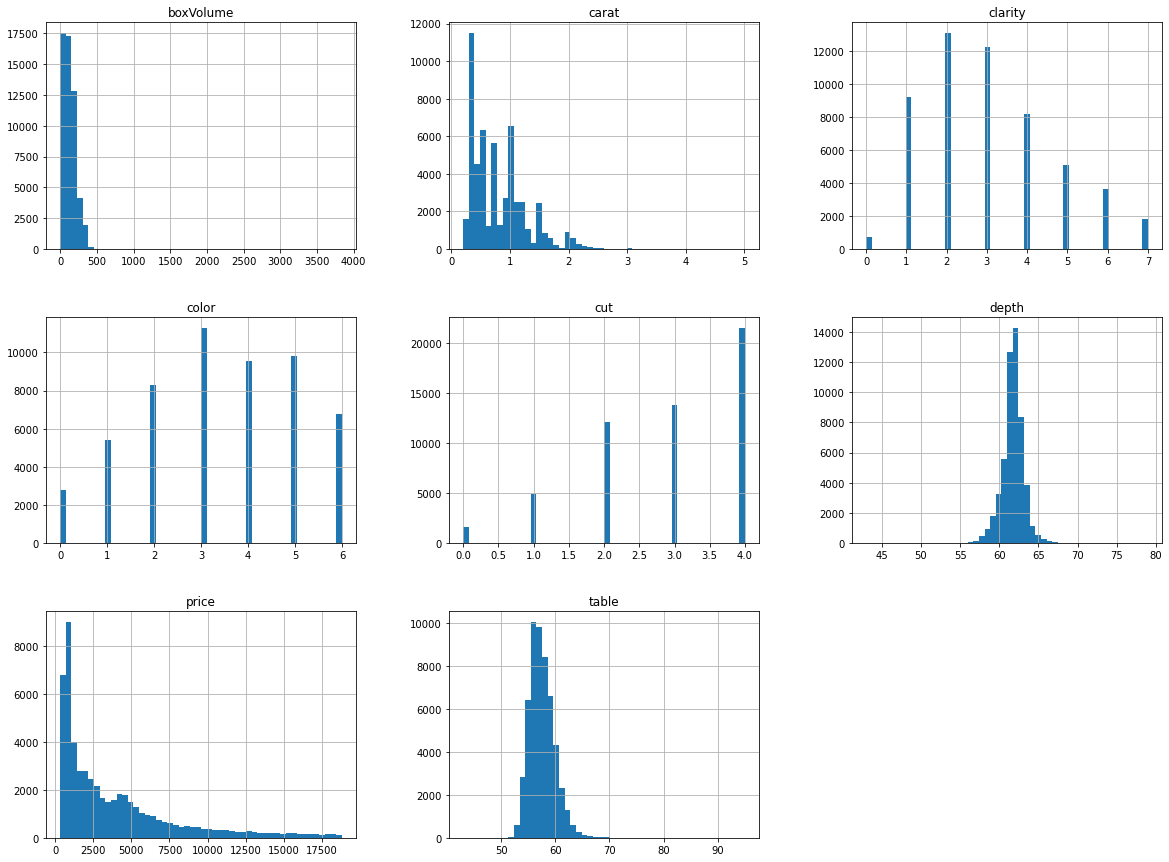

In [54]:
dfCopy.hist(bins=50, figsize=(20,15))

In [55]:
dfCopy.corr()

,carat,cut,color,clarity,depth,table,price,boxVolume
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.976308
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.118368
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.284267
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.341044
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,0.009157
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.167400
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.902385
boxVolume,0.976308,-0.118368,-0.284267,-0.341044,0.009157,0.167400,0.902385,1.000000


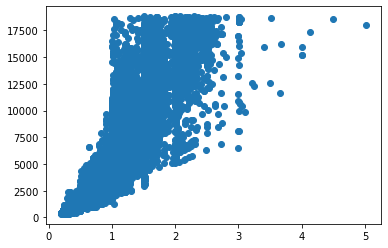

In [57]:
plt.scatter(dfCopy['carat'], dfCopy['price'])

In [59]:
def trainTestSplit(df, testRatio):
    shuffle = np.random.permutation(len(df))
    testSize = int(len(df) * testRatio)
    test = shuffle[:testSize]
    train = shuffle[testSize:]
    return df.iloc[train], df.iloc[test]
mainTraindf, mainTestdf = trainTestSplit (dfCopy, 0.2)
mainTraindf.to_csv('Datasets/Regression/Export/mainTrain.csv')
mainTestdf.to_csv('Datasets/Regression/Export/mainTest.csv')
####                                      Was written, now unneded - split and save test and train

In [60]:
mainTraindf = pd.read_csv('Datasets/Regression/Export/mainTrain.csv') #importing the dataframe 'mainTrain.csv' from the appropriate folder
mainTestdf = pd.read_csv('Datasets/Regression/Export/mainTest.csv') #importing the dataframe 'mainTest.csv' from the appropriate folder

In [61]:
mainTraindf

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,boxVolume
0,17911,1.01,1,5,4,63.4,58.0,7234,163.930272
1,11232,0.90,4,2,4,61.8,55.0,4964,145.654308
2,40393,0.40,2,6,5,60.8,56.0,1133,67.275632
3,34245,0.40,2,6,1,63.4,56.0,855,65.825518
4,37622,0.44,3,1,6,62.5,60.0,990,71.124402
...,...,...,...,...,...,...,...,...,...
43147,43,0.26,1,6,4,58.4,63.0,403,43.703376
43148,13556,1.18,4,1,4,62.2,57.0,5551,190.339968
43149,40417,0.50,4,0,4,61.4,58.0,1134,82.412190
43150,49004,0.51,2,4,5,62.7,56.0,2051,84.147903


In [62]:
mainTestdf

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,boxVolume
0,24074,1.51,4,2,3,62.4,56.0,12219,243.332544
1,40809,0.51,1,5,2,63.6,59.0,1170,84.103272
2,21480,1.52,2,1,4,62.2,63.0,9576,236.728998
3,15164,1.31,3,2,3,59.6,58.0,6095,214.337088
4,15163,1.24,4,2,2,62.5,56.0,6095,205.197376
...,...,...,...,...,...,...,...,...,...
10783,1523,1.01,0,0,5,66.0,56.0,2998,161.581294
10784,8235,1.02,2,4,1,60.0,57.0,4373,168.605253
10785,15521,1.02,3,4,3,62.7,59.0,6220,166.360012
10786,28978,0.25,2,5,3,63.3,56.0,436,41.413275


In [77]:
#mainTraindf = mainTraindf.drop(['Unnamed: 0'], axis = 1)
#mainTestdf = mainTestdf.drop(['Unnamed: 0'], axis = 1)

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = False)
model.fit(mainTraindf.drop(['price'], axis = 1), mainTraindf['price'])
predictions = model.predict(mainTestdf.drop(['price'], axis = 1))
predictions

array([9871.54831259, 1001.8693228 , 9729.02296075, ..., 5980.71486053,
       -551.36891632, 8780.67858537])

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

final_mse = mean_squared_error(mainTestdf['price'], predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

r2_score(mainTestdf['price'], predictions)

0.8991059621325956

In [91]:
from sklearn.model_selection import cross_val_score

toTrainBy = mainTraindf.drop(['price'], axis = 1)

scores = cross_val_score(model, toTrainBy, mainTraindf['price'], cv=5).mean()
scores

0.9048118277675081